# Cat vs. Dog Image Classification Using SVM
---

**Problem Statement**
Implement a Support Vector Machine (SVM) to classify images of cats and dogs using the Kaggle "Dogs vs. Cats" dataset. The goal is to build a model that can accurately distinguish between cat and dog images based on their pixel features.

**Approach**
- Data Loading and Exploration
- Data Preprocessing
- Feature Selection
- Model Training
- Evaluation
- Visualization

In [3]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

**Load and preprocess images**

In [7]:
def load_images(folder, label, img_size=(64, 64), max_images=1000):
    images, labels = [], []
    files = [f for f in os.listdir(folder) if f.endswith('.jpg')][:max_images]
    for file in files:
        img = cv2.imread(os.path.join(folder, file))
        img = cv2.resize(img, img_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
        images.append(img.flatten())
        labels.append(label)
    return images, labels

cat_images, cat_labels = load_images('test_set/test_set/cats', 0)
dog_images, dog_labels = load_images('test_set/test_set/dogs', 10)

X = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

**Normalize pixel values**

In [11]:
X = X / 255.0

**Train-test split**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

**Train SVM**

In [19]:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

**Evaluate**

In [22]:
y_pred = svm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5075
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.55      0.53       200
          10       0.51      0.47      0.49       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400



**Confusion Matrix**

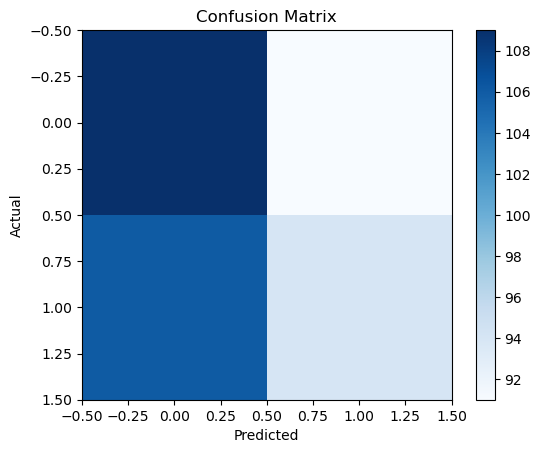

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()

**Conclusion**
--
An SVM classifier can effectively distinguish between cat and dog images when provided with well-preprocessed data. While SVMs are not optimal for large, high-dimensional image datasets compared to deep learning, they offer a simple and interpretable baseline for binary image classification tasks.